In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use("dark_background")

import sys
import os
import bungee
import cenote
import yaml
import pint
import numpy as np

UREG = cenote.UREG
UREG.setup_matplotlib()

PATH = os.path.join(os.environ["SRC_DIR"], "examples", "big.yaml")

input_plan = cenote.get_plan(PATH)
output_plan = bungee.replan(input_plan)
result = cenote.get_result(output_plan)

In [2]:
for point in output_plan.profile():
    depth = (point.depth.value() * cenote.DEPTH_UNIT).to(cenote.DEPTH_DISPLAY_UNIT)
    time = (point.time.value() * cenote.TIME_UNIT).to(cenote.TIME_DISPLAY_UNIT)
    print("{depth:~.0f}\t{time:~.0f}\t{tank}".format(depth=depth, time=time, tank=point.tank))

0 ft	0 min	Sidemount
150 ft	5 min	Sidemount
150 ft	40 min	Sidemount
40 ft	46 min	Deco50
40 ft	47 min	Deco50
30 ft	48 min	Deco50
30 ft	52 min	Deco50
20 ft	53 min	Deco100
20 ft	58 min	Deco100
10 ft	59 min	Deco100
10 ft	68 min	Deco100
0 ft	69 min	Deco100


<IPython.core.display.Javascript object>


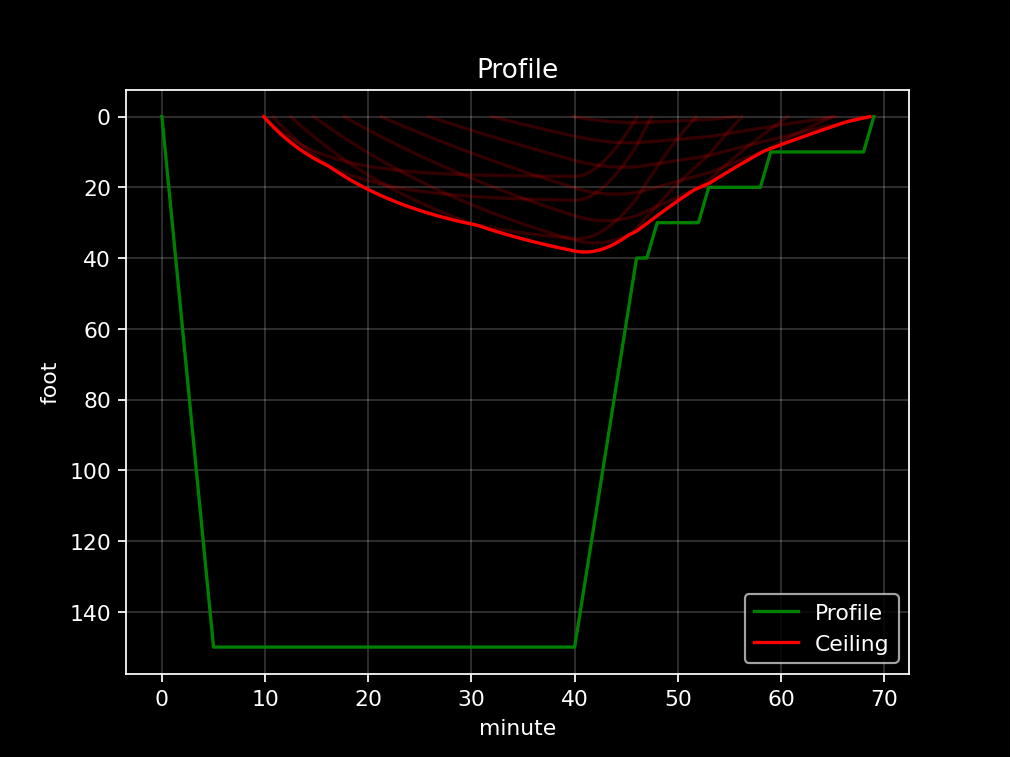

Text(0.5, 1.0, 'Profile')

In [3]:
# Depth
plt.figure()
plt.plot(result.time, result.depth, "g", label="Profile")
idxs = np.nonzero(result.deco.ceiling > 0)[0]
plt.plot(result.time[idxs], result.deco.ceiling[idxs], "r", label="Ceiling")
plt.legend(loc="best")
for i in range(result.deco.ceilings.shape[0]):
    idxs = np.nonzero(result.deco.ceilings[i, :] > 0)[0]
    if len(idxs):
        plt.plot(result.time[idxs], result.deco.ceilings[i, idxs], "r", alpha=0.2)
plt.gca().invert_yaxis()
plt.grid(alpha=0.2)
plt.title("Profile")

<IPython.core.display.Javascript object>


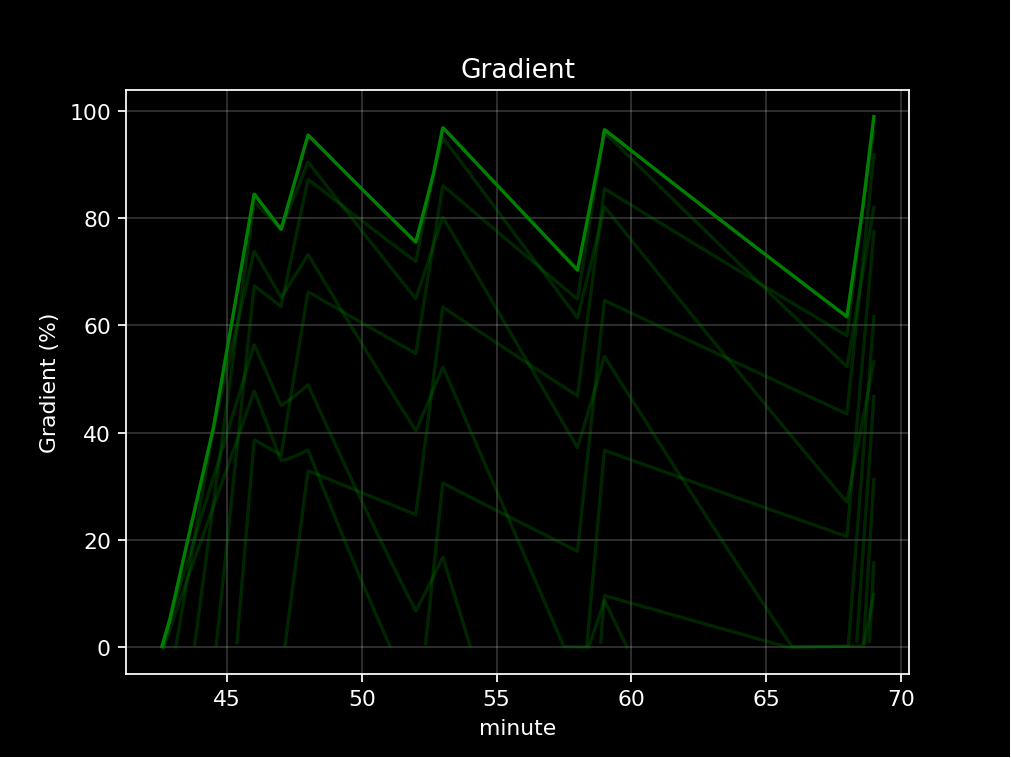

Text(0.5, 1.0, 'Gradient')

In [4]:
import numpy as np

plt.figure()

idxs = np.nonzero(result.deco.gradient >= 0)[0]
plt.plot(result.time[idxs], result.deco.gradient[idxs] * 100, "g")
for i in range(result.deco.gradients.shape[0]):
    idxs = np.nonzero(result.deco.gradients[i, :] > 0)[0]
    if len(idxs):
        plt.plot(result.time[idxs], result.deco.gradients[i, idxs] * 100, "g", alpha=0.3)
plt.grid(alpha=0.2)
plt.ylabel("Gradient (%)")
plt.title("Gradient")

<IPython.core.display.Javascript object>


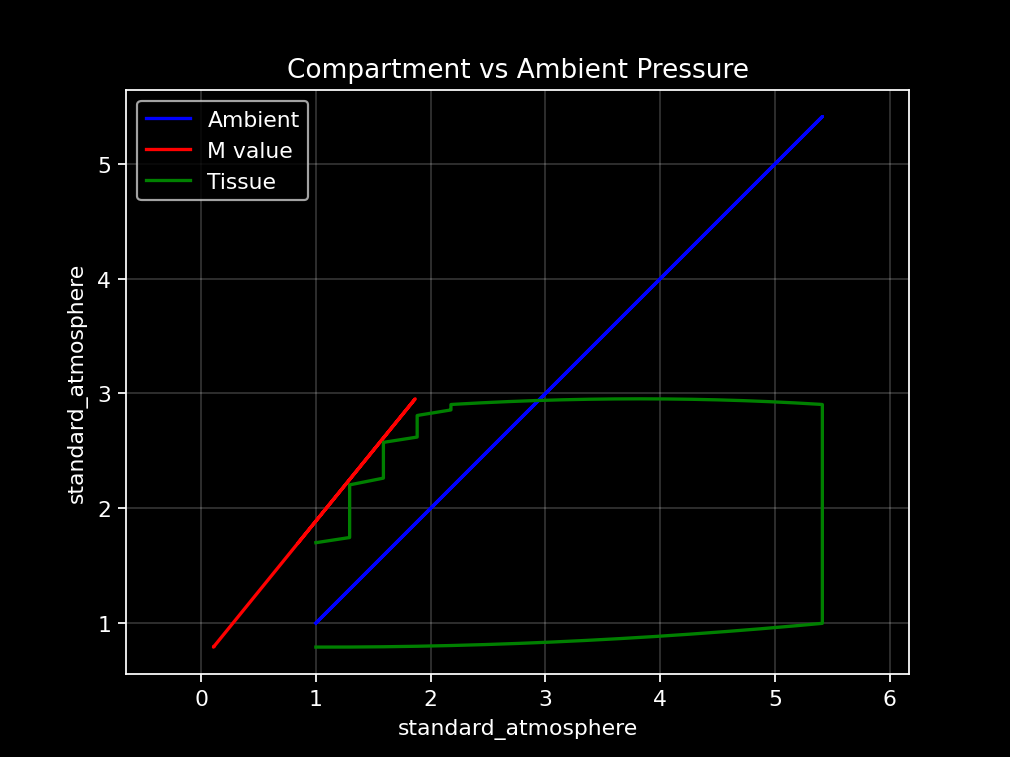

<IPython.core.display.Javascript object>


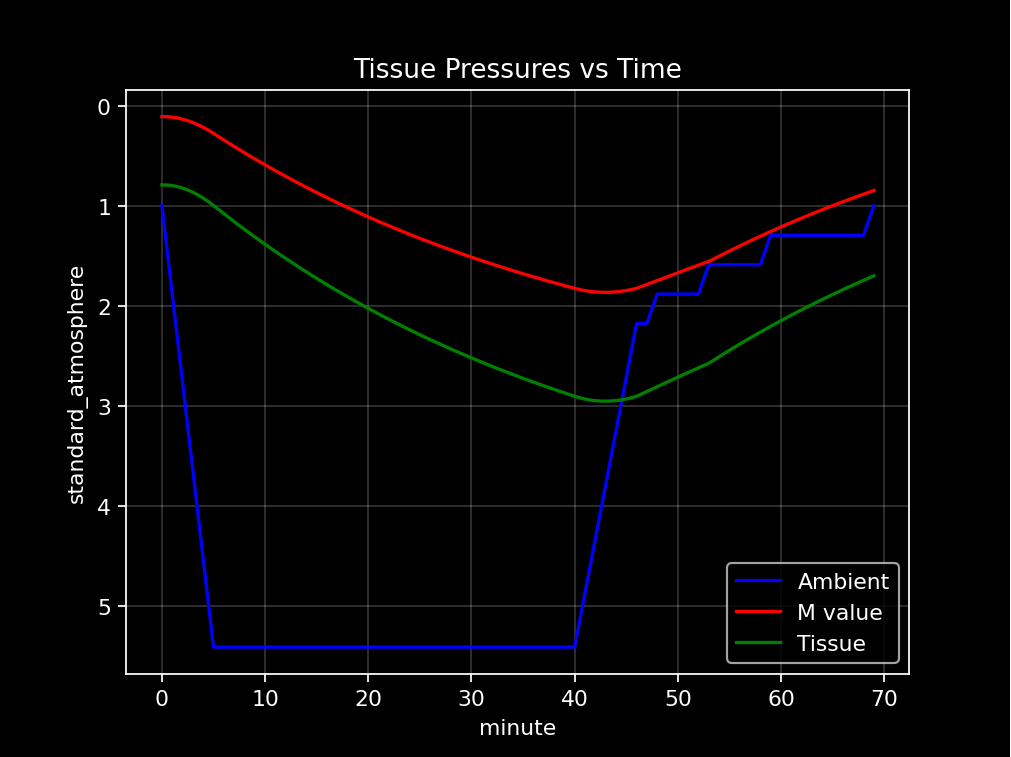

Text(0.5, 1.0, 'Tissue Pressures vs Time')

In [5]:
# single compartment analysis

COMPARTMENT = 5

# ambient_pressure = [cenote.pressure_from_depth(d, plan.water()) for d in result.depth]
plt.figure()
plt.plot(result.ambient_pressure, result.ambient_pressure, "b", label="Ambient")
plt.plot(result.deco.M0s[COMPARTMENT, :], result.deco.tissue_pressures[COMPARTMENT, :], "r", label="M value")
plt.plot(result.ambient_pressure, result.deco.tissue_pressures[COMPARTMENT, :], "g", label="Tissue")
plt.legend(loc="best")
plt.axis("equal")
plt.grid(alpha=0.2)
plt.title("Compartment vs Ambient Pressure")

plt.figure()
plt.plot(result.time, result.ambient_pressure, "b", label="Ambient")
plt.plot(result.time, result.deco.M0s[COMPARTMENT, :], "r", label="M value")
plt.plot(result.time, result.deco.tissue_pressures[COMPARTMENT, :], "g", label="Tissue")
plt.legend(loc="best")
plt.grid(alpha=0.2)
plt.gca().invert_yaxis()
plt.title("Tissue Pressures vs Time")

<IPython.core.display.Javascript object>


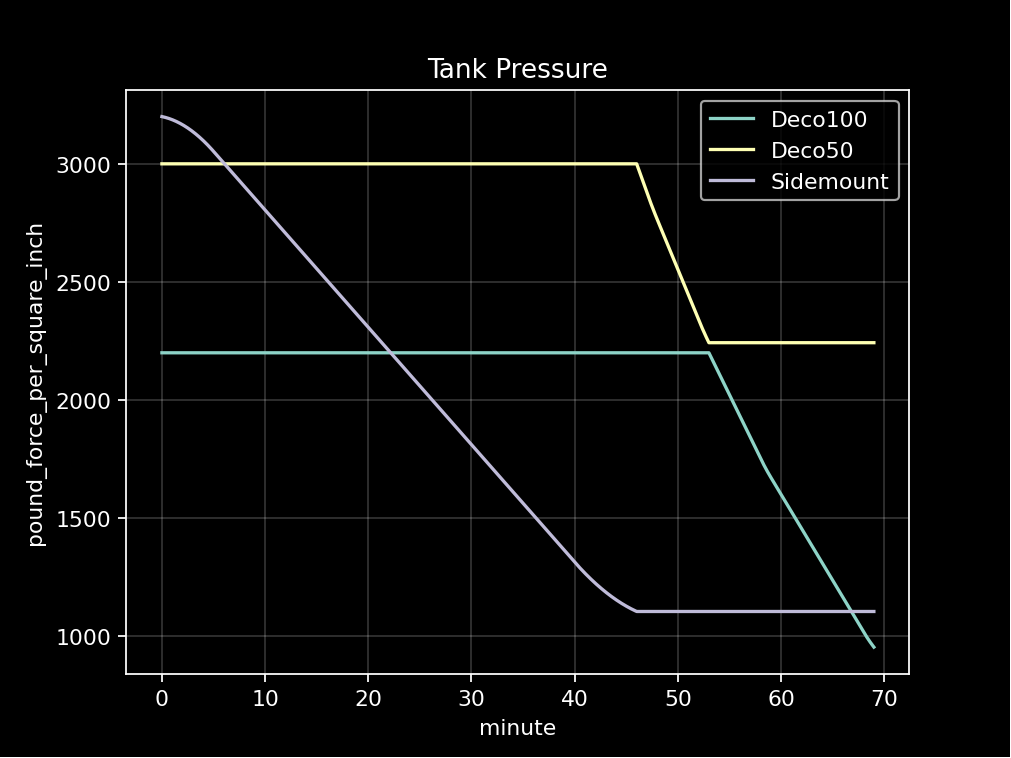

In [6]:
# Pressure
plt.figure()
for tank in result.tank_pressure:
    plt.plot(result.time, result.tank_pressure[tank], label=tank)
plt.grid(alpha=0.2)
plt.title("Tank Pressure")
plt.legend(loc="best")